In [1]:
#Import Turing, Distributions and StatsBase
using Turing, Distributions, StatsBase

# Import MCMCChain, Plots and StatsPlots for visualizations and diagnostics.
using MCMCChains, Plots, StatsPlots

# Set a seed for reproducibility.
using Random
Random.seed!(12);

# Turn off progress monitor.
Turing.turnprogress(false)

┌ Info: [Turing]: global PROGRESS is set as false
└ @ Turing /home/saumya/.julia/packages/Turing/RZOZ8/src/Turing.jl:24


false

In [2]:
# Generating data
N = 500
s = zeros(N)
μ = 5
for i=3:N
    s[i] = μ + rand(Normal(0, 1)) + 0.5*rand(Normal(0, 1)) + 0.4*rand(Normal(0, 1))
end

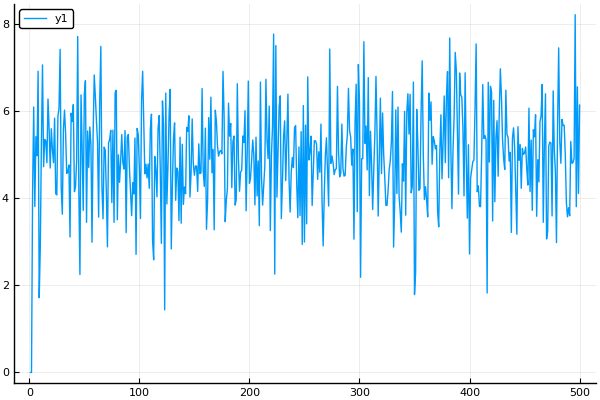

In [3]:
pyplot()
plot(s)

In [4]:
#Define the model

σ = 1
@model MA(x, N) = begin
    beta_1 ~ Uniform(-1, 1)
    beta_2 ~ Uniform(-1, 1)
    μ ~ Uniform(0, 10)
    for t in 3:N
        val = μ + rand(Normal(0,σ)) + beta_1 * rand(Normal(0, 1)) + beta_2 * rand(Normal(0, 1)) 
        x[t] ~ Normal(val, 1) 
    end
end;

In [5]:
# This is temporary while the reverse differentiation backend is being improved.
Turing.setadbackend(:forward_diff)

# Sampling using NUTS
# NUTS(n_iters::Int, n_adapts::Int, δ::Float64), where:
# n_iters::Int : The number of samples to pull.
# n_adapts::Int : The number of samples to use with adapatation.
# δ::Float64 : Target acceptance rate.
chain = sample(MA(s, N), NUTS(500, 200, 0.65) )

┌ Info: [Turing] looking for good initial eps...
└ @ Turing.Inference /home/saumya/.julia/packages/Turing/RZOZ8/src/inference/support/hmc_core.jl:247
┌ Info: [Turing] found initial ϵ: 0.04262700378933461
└ @ Turing.Inference /home/saumya/.julia/packages/Turing/RZOZ8/src/inference/support/hmc_core.jl:239
┌ Info:  Adapted ϵ = 5.372056017691958e-29, std = [1.0, 1.0, 1.0]; 200 iterations is used for adaption.
└ @ Turing.Inference /home/saumya/.julia/packages/Turing/RZOZ8/src/inference/adapt/adapt.jl:90


[NUTS] Finished with
  Running time        = 96.59210343699999;
  #lf / sample        = 0.0;
  #evals / sample     = 0.002;
  pre-cond. metric    = [1.0, 1.0, 1.0].


Object of type Chains, with data of type 500×9×1 Array{Union{Missing, Float64},3}

Log evidence      = 0.0
Iterations        = 1:500
Thinning interval = 1
Chains            = 1
Samples per chain = 500
internals         = elapsed, epsilon, eval_num, lf_eps, lf_num, lp
parameters        = beta_1, μ, beta_2

2-element Array{ChainDataFrame,1}

Summary Statistics
. Omitted printing of 1 columns
│ Row │ parameters │ mean      │ std      │ naive_se   │ mcse      │ ess     │
│     │ Symbol     │ Float64   │ Float64  │ Float64    │ Float64   │ Any     │
├─────┼────────────┼───────────┼──────────┼────────────┼───────────┼─────────┤
│ 1   │ beta_1     │ -0.523578 │ 0.151808 │ 0.00678905 │ 0.0170925 │ 6.55421 │
│ 2   │ beta_2     │ -0.583993 │ 0.172626 │ 0.00772008 │ 0.01949   │ 6.54795 │
│ 3   │ μ          │ 4.97177   │ 0.183883 │ 0.0082235  │ 0.0110142 │ 7.15047 │

Quantiles

│ Row │ parameters │ 2.5%      │ 25.0%     │ 50.0%     │ 75.0%     │ 97.5%     │
│     │ Symbol     │ Float64   │ Float64

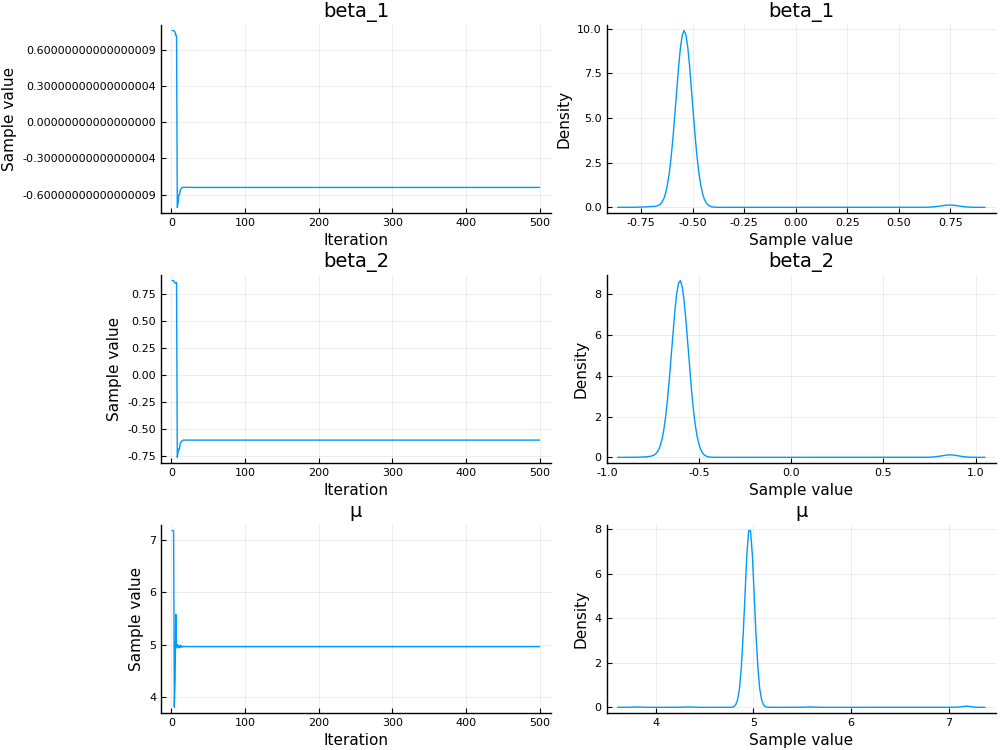

In [6]:
# Plotting the chain distribution of the sampled parameters and their values over the 500 iterations
plot(chain)

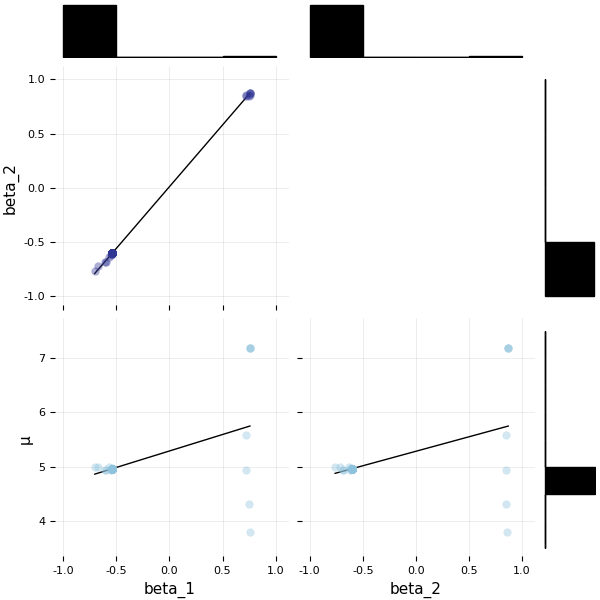

In [7]:
corner(chain)

In [8]:
# Note that roughly the first 50 samples are the warmup samples
# Removing these warmup samples
chain_new = chain[50:500]

Object of type Chains, with data of type 451×9×1 Array{Union{Missing, Float64},3}

Log evidence      = 0.0
Iterations        = 50:500
Thinning interval = 1
Chains            = 1
Samples per chain = 451
internals         = elapsed, epsilon, eval_num, lf_eps, lf_num, lp
parameters        = beta_1, μ, beta_2

2-element Array{ChainDataFrame,1}

Summary Statistics
. Omitted printing of 2 columns
│ Row │ parameters │ mean      │ std        │ naive_se    │ mcse        │
│     │ Symbol     │ Float64   │ Float64    │ Float64     │ Float64     │
├─────┼────────────┼───────────┼────────────┼─────────────┼─────────────┤
│ 1   │ beta_1     │ -0.54067  │ 2.80154e-9 │ 1.31919e-10 │ 5.01572e-10 │
│ 2   │ beta_2     │ -0.603483 │ 1.49978e-9 │ 7.06218e-11 │ 2.6089e-10  │
│ 3   │ μ          │ 4.96076   │ 2.20841e-8 │ 1.0399e-9   │ 7.04411e-9  │

Quantiles

│ Row │ parameters │ 2.5%      │ 25.0%     │ 50.0%     │ 75.0%     │ 97.5%     │
│     │ Symbol     │ Float64   │ Float64   │ Float64   │ Float64   │ 

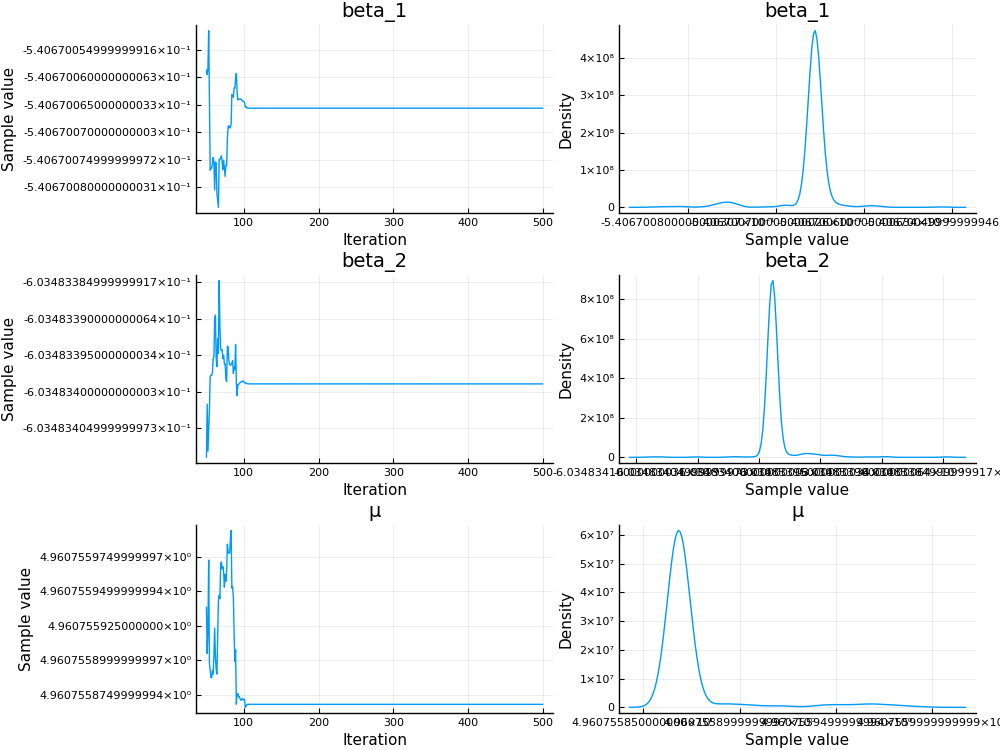

In [9]:
#Plots for the new chain with the warmup samples removed  
plot(chain_new)

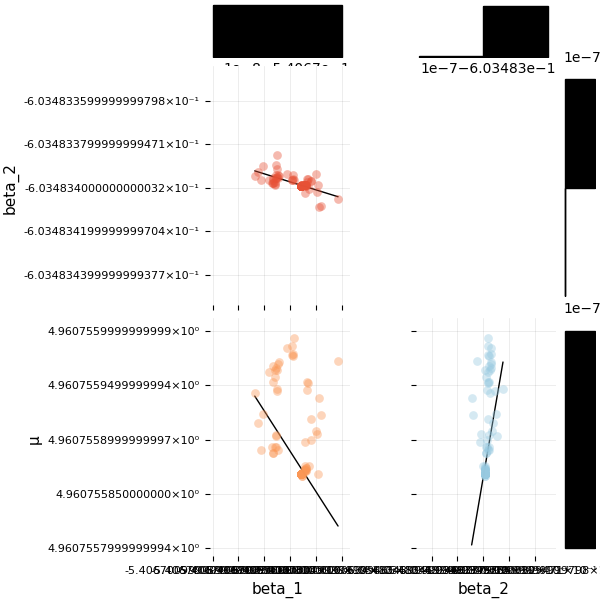

In [10]:
corner(chain_new)